<a href="https://colab.research.google.com/github/PranavvNambiar/AutoLicensePlateDetection/blob/main/License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***License Plate Detection***
> This repository contains the implementation of a License Plate Detection system using YOLOv9 and OpenCV. The project leverages the power of deep learning and computer vision to accurately detect license plates in images and video streams. A custom dataset has been used to train the YOLOv9 model, ensuring high accuracy and robustness in various real-world scenarios.


## Pre-Requisites
Checking to see if we have access to a GPU, which is mandatory

In [2]:
!nvidia-smi

Tue Sep 17 08:06:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
os.chdir("/content")
home = os.getcwd()
home

'/content'

### Cloning YoloV9 Github

In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 28.05 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


In [5]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00


### Importing the packages

In [6]:
import roboflow
from IPython.display import Image

### Model Weights
As the weights for certain YOLOv9 models are not available, we need to make a directory to store these weights

In [7]:
!mkdir -p {home}/weights

In [8]:
!wget -P {home}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

In [9]:
!ls -la {home}/weights

total 100748
drwxr-xr-x 2 root root      4096 Sep 17 08:06 .
drwxr-xr-x 1 root root      4096 Sep 17 08:06 ..
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt


In [10]:
!mkdir -p {home}/data

## Object Detection with the Pre-Trained Model
We will use the yolov9-c model for this

In [11]:
!python detect.py --weights {home}/weights/yolov9-c.pt --conf 0.1 --source {home}/sample_data/27.jpg --device 0

detect: weights=['/content/weights/yolov9-c.pt'], source=/content/sample_data/27.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights

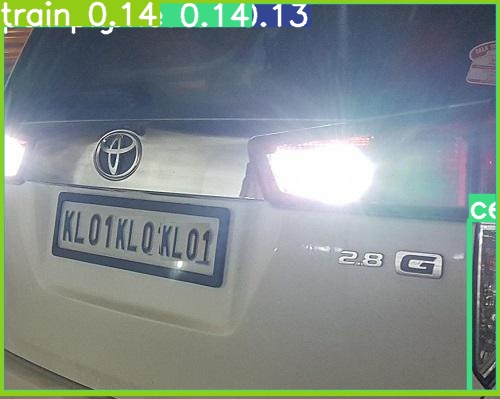

In [13]:
Image(filename=f"{home}/yolov9/runs/detect/exp/27.jpg", width=600)

### Downloading the dataset into the Notebook

In [14]:
from google.colab import userdata
API = userdata.get('API_KEY')

%cd {home}/yolov9

from roboflow import Roboflow
rf = Roboflow(api_key=API)
project = rf.workspace("licenseplatedetection-dzoke").project("licenseplatedetection-r3nkc")
version = project.version(1)
dataset = version.download("yolov9")

/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to licensePlateDetection-1 in yolov9:: 100%|██████████| 928/928 [00:00<00:00, 6956.87it/s]


### Training our custom model
`In the /content/yolov9/licensePlateDetection-1/data.yaml file, change the locations of the file as stored in the directory`

In [15]:
%cd {home}/yolov9

!python train_dual.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/licensePlateDetection-1/data.yaml \
--weights {home}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-09-17 08:07:22.476261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 08:07:22.498353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 08:07:22.505065: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 08:07:22.521964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 08:07:24.485822: W tensorf

#### ***Observations/Results*** -
---
*  The model shows strong performance throughout training, with consistently high precision, recall, and mAP values.
*  The fluctuations in precision, recall, and mAP values indicate typical training dynamics, where the model adjusts to the data and potentially overfits at times
<br><br>
After training our model, with the custom license plate dataset that we have provided. The results obtained are as follows - <br>
P - Precision<br>
`Precision is the ratio of true positive detections (correctly identified objects) to the total number of positive predictions`<br>
P - 0.99. (0 <= P <=1). (Higher is Better) <br>
A precision of 0.99 means that 99% of the objects predicted by the model were correct.
<br><br>
R - Recall <br>
`Recall is the ratio of true positive detections to the total number of actual objects`<br>
R - 0.864. (0 <= R <=1). (Higher is Better)<br>
A recall of 0.864 means that the model correctly identified 86.4% of all actual objects in the images.
<br><br>
mAP50 - Mean Average Precision at IoU (Intersection over Union) 0.5<br>
`This is the average precision of the model when the Intersection over Union (IoU) threshold is 0.5`<br>
mAP50 - 0.958. (0 <= mAP50 <=1). (Higher is Better)<br>
An mAP50 of 0.958 means that, on average, the precision of the model is 95.8% when considering an IoU threshold of 0.5.
<br><br>
mAP50-95 - Mean Average Precision at IoU 0.5 to 0.95<br>
`This is the average precision of the model across multiple IoU thresholds (from 0.5 to 0.95 in steps of 0.05)`<br>
mAP50-95 - 0.958. (0 <= mAP50-95 <=1). (Higher is Better)<br>
An mAP50-95 of 0.798 means that the model has an average precision of 79.8% across these varying IoU thresholds.


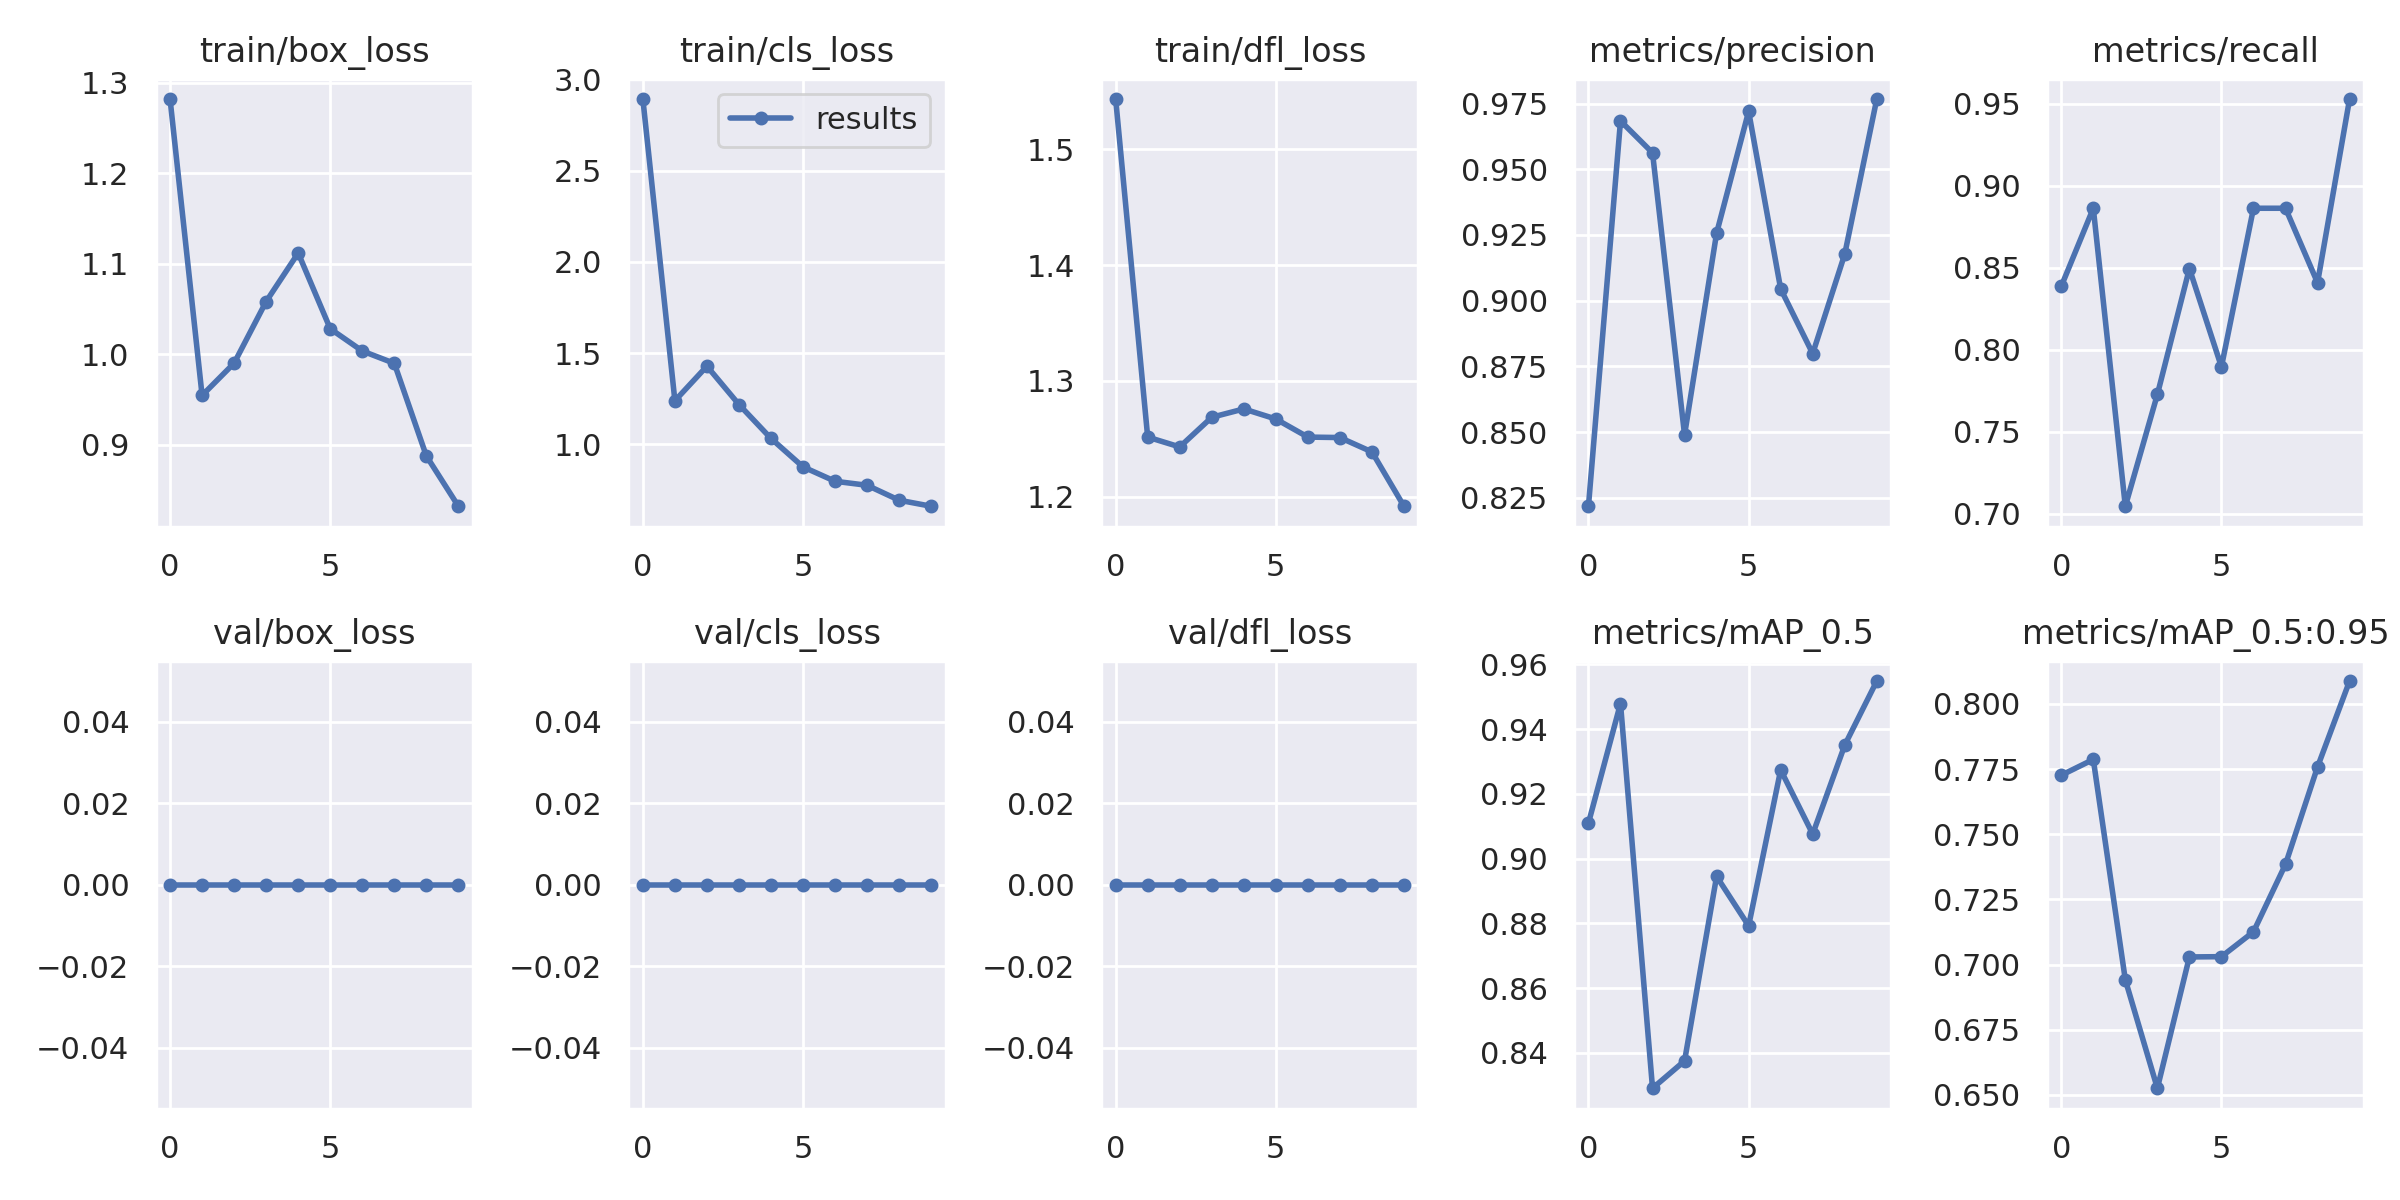

In [16]:
Image(filename=f"{home}/yolov9/runs/train/exp/results.png", width=1000)

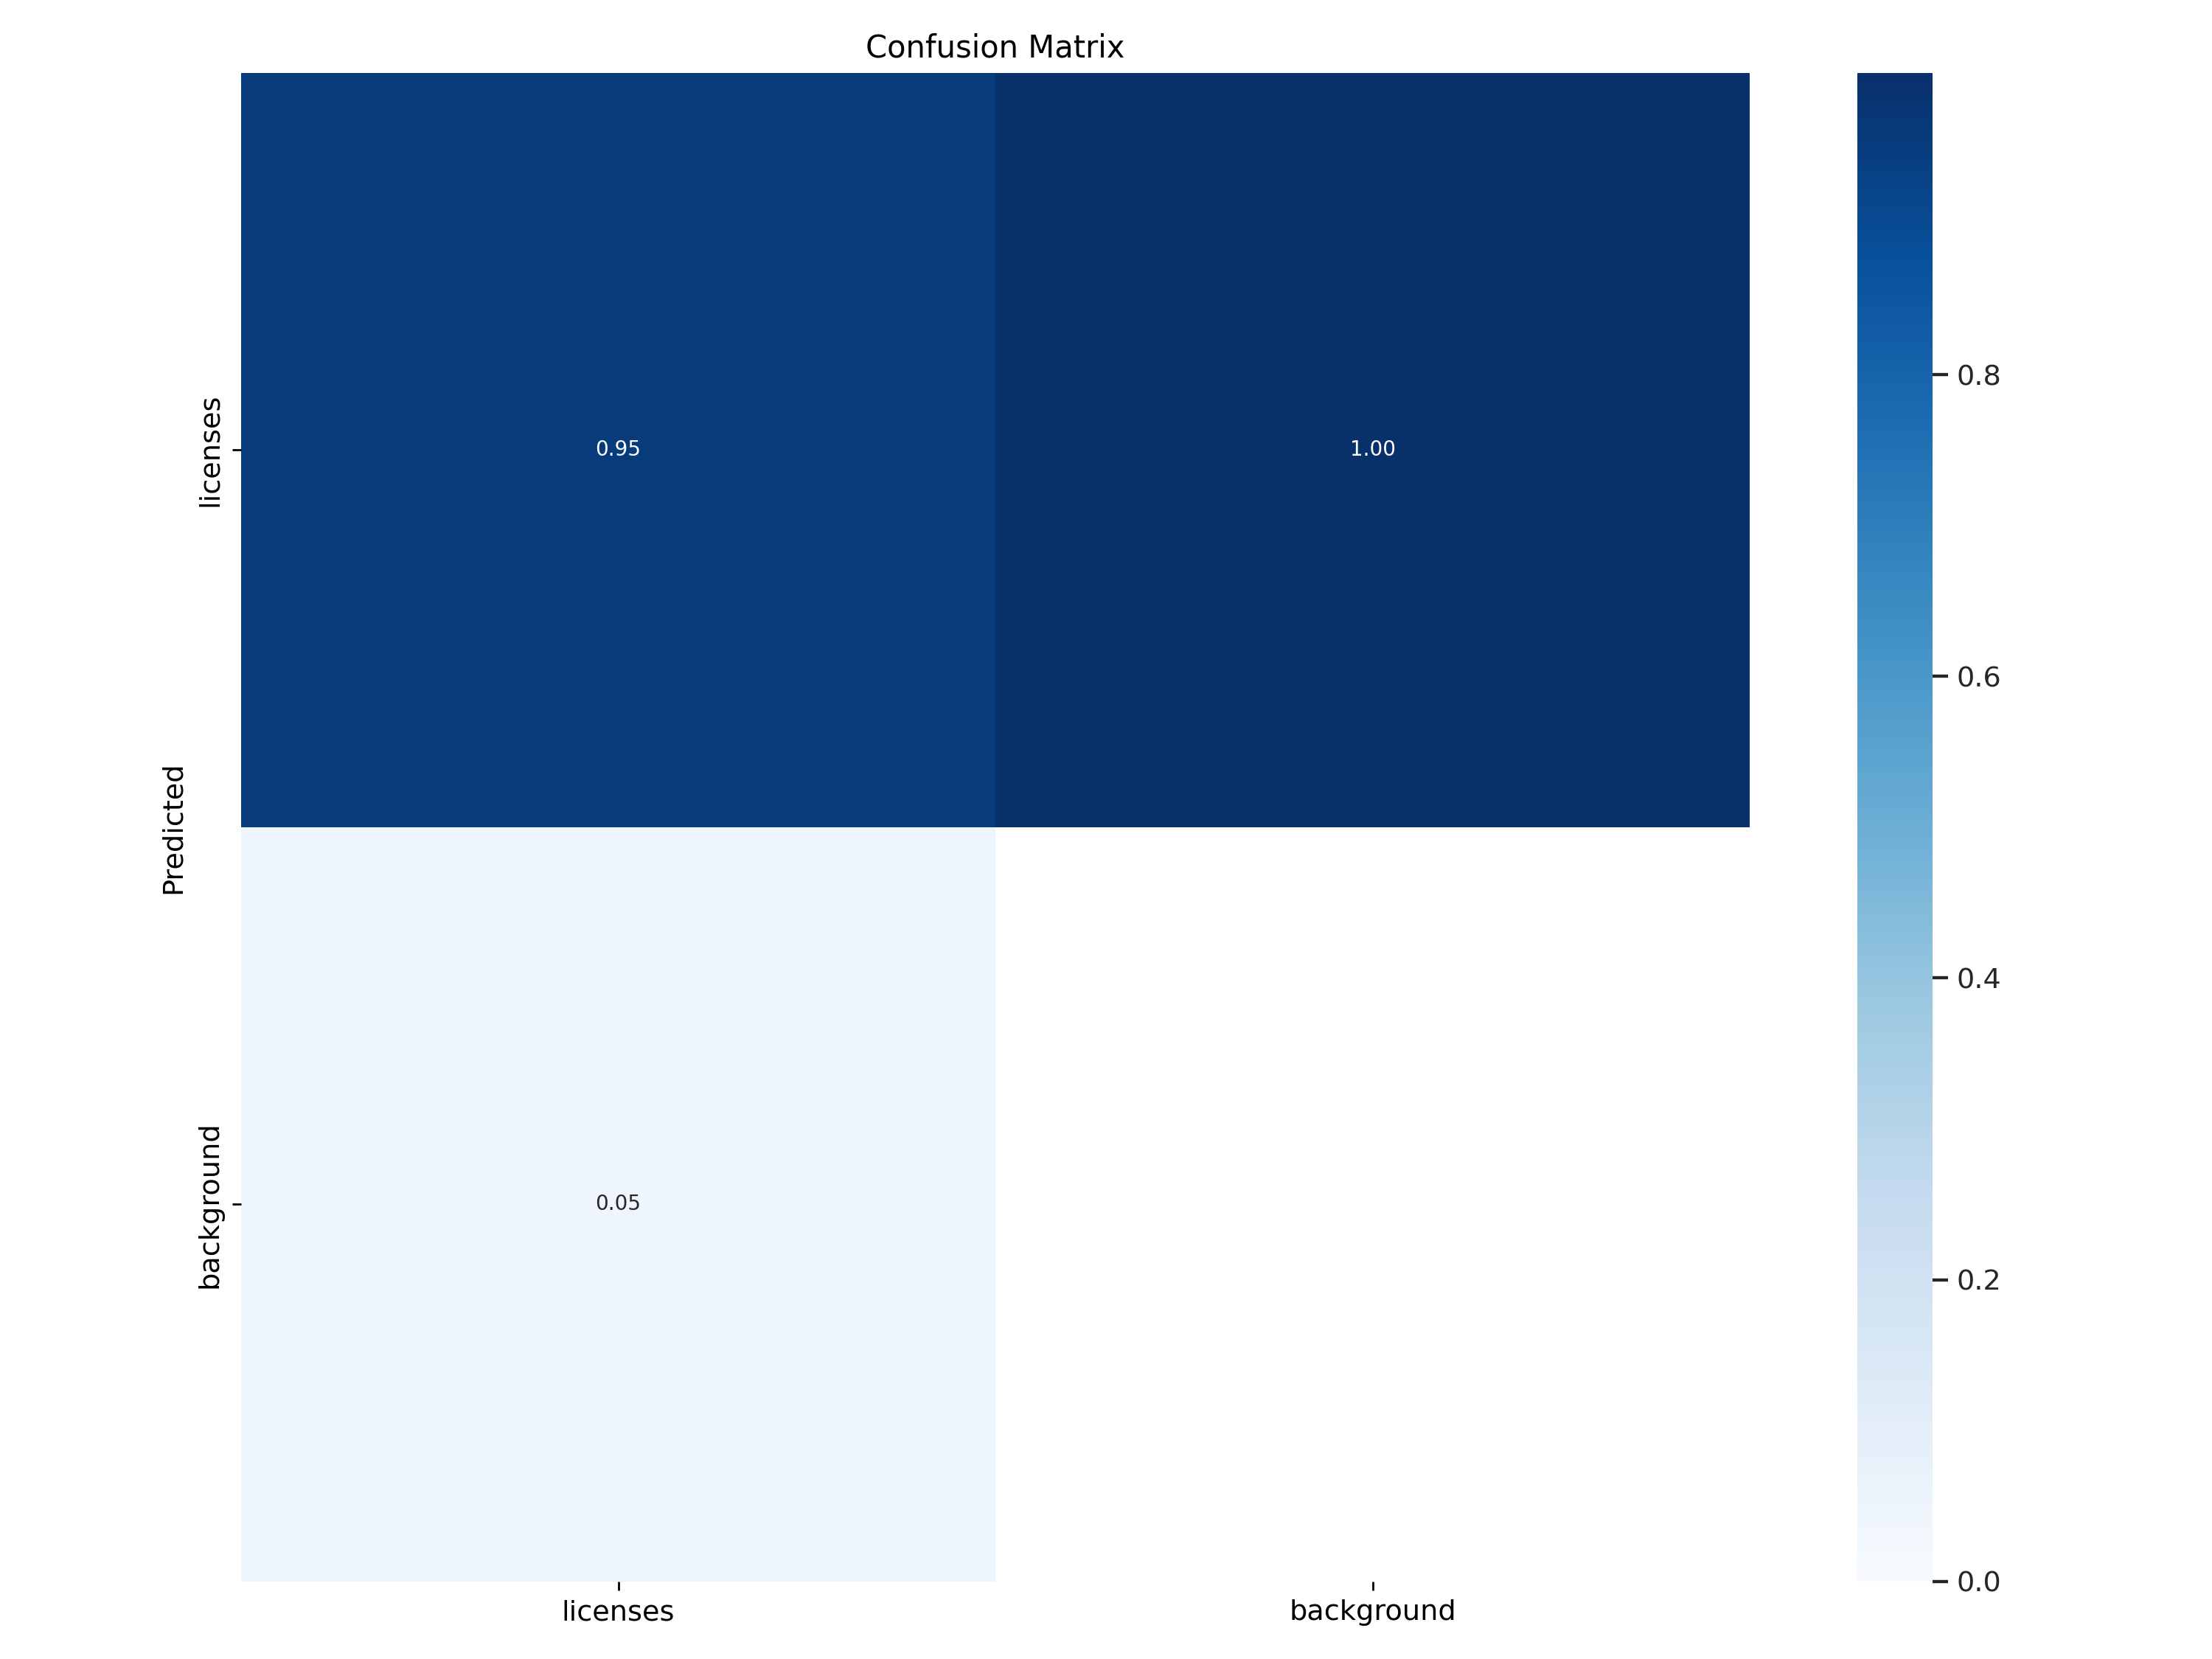

In [17]:
Image(filename=f"{home}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

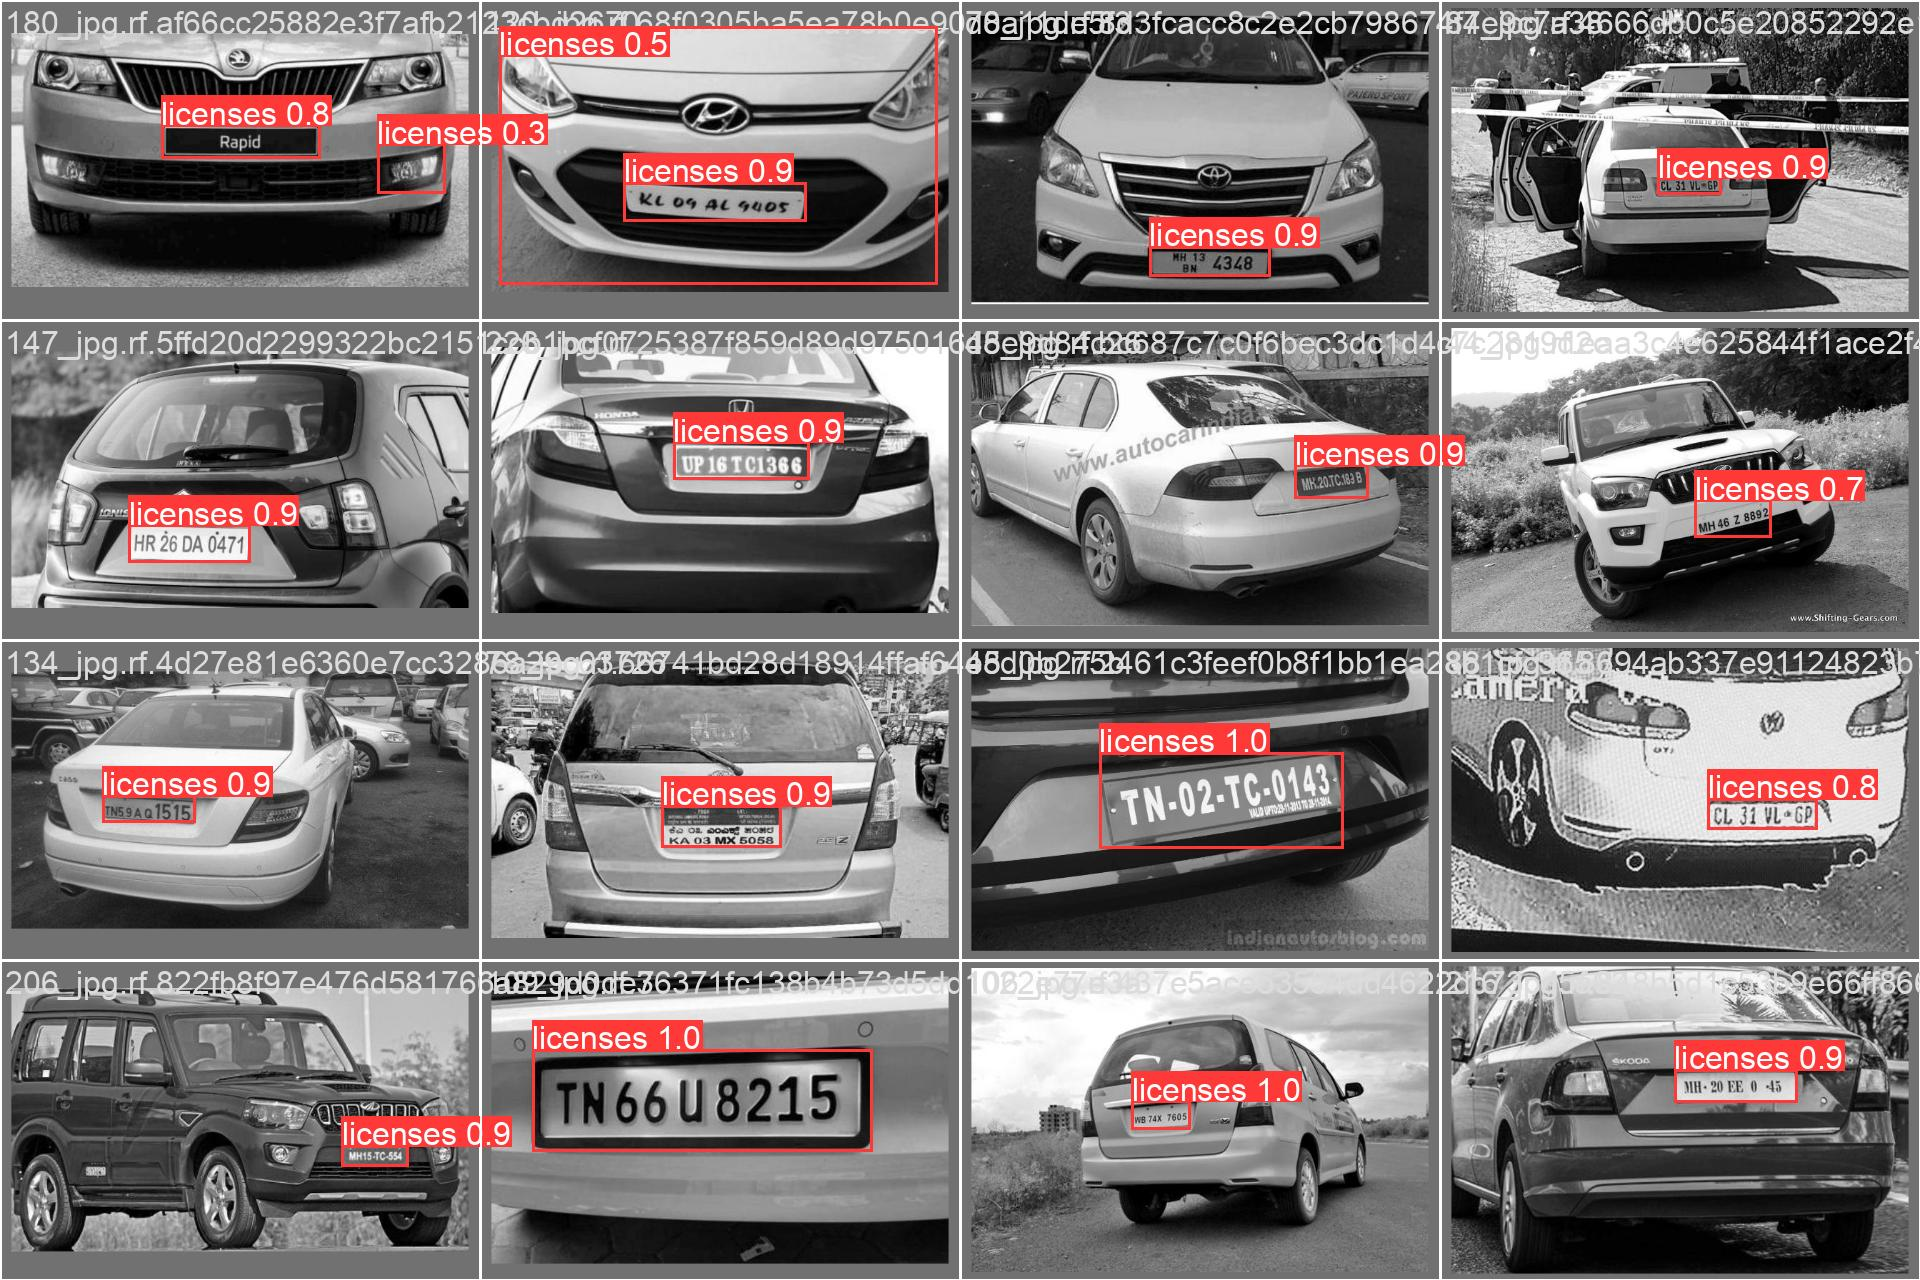

In [18]:
Image(filename="/content/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validating the Custom Model

In [19]:
%cd {home}/yolov9

!python val_dual.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data /content/yolov9/licensePlateDetection-1/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val_dual: data=/content/yolov9/licensePlateDetection-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

## Inference with the Custom Model

In [20]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/licensePlateDetection-1/valid/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/licensePlateDetection-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a fut

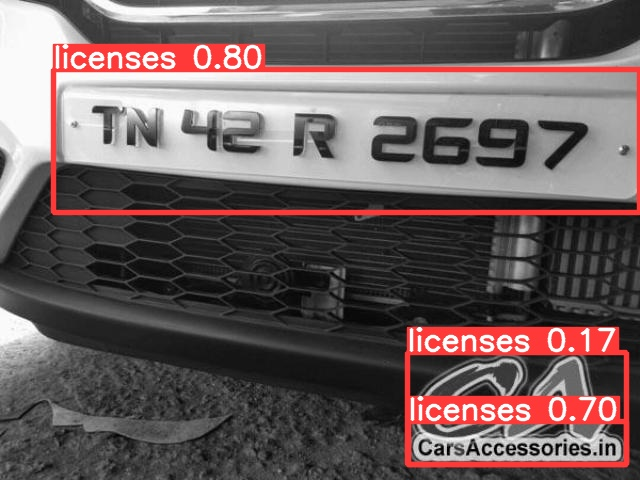

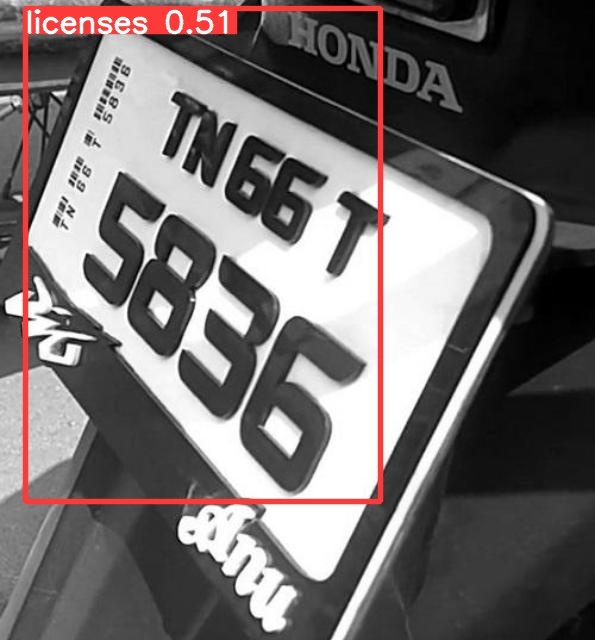

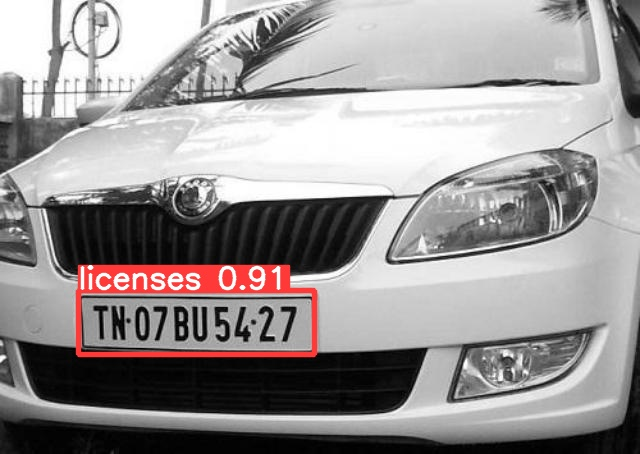

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{home}/yolov9/runs/detect/exp2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Using Visual OCR to Detect the License Plate Number

In [22]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 20.9 MB/s eta 0:00:00


*  Now we will make some changes to the detect.py method to be able to use Easy OCR to detect the Text within the images.
*   The new detect file named detect_2.py is uploaded to the yolov9 folder to be used.


In [37]:
##Change the Source based on the output path in the results of training the model
!python detect_2.py --conf 0.1 --device 0 --weights /content/yolov9/runs/train/exp/weights/best.pt --source /content/yolov9/runs/detect/exp2

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

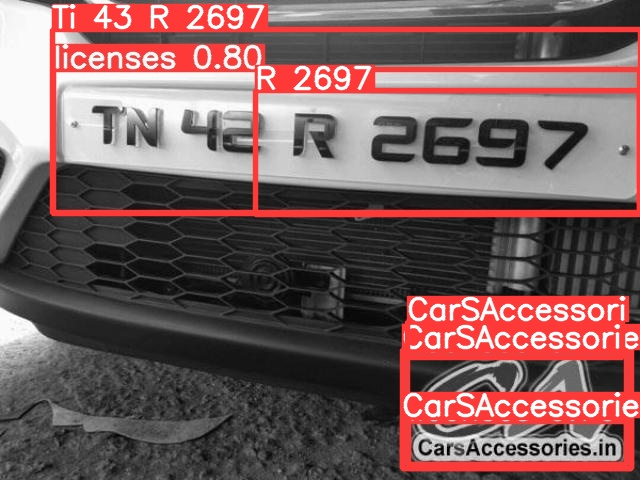

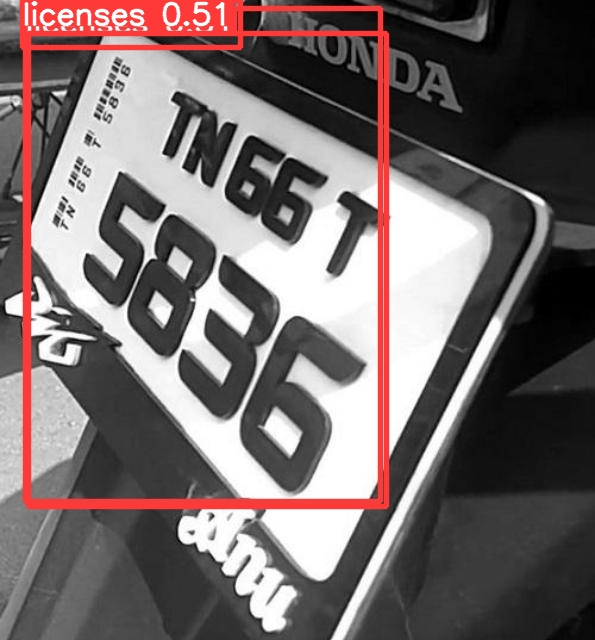

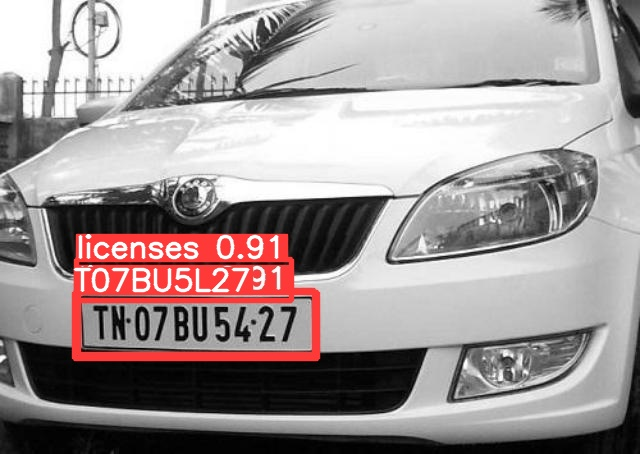

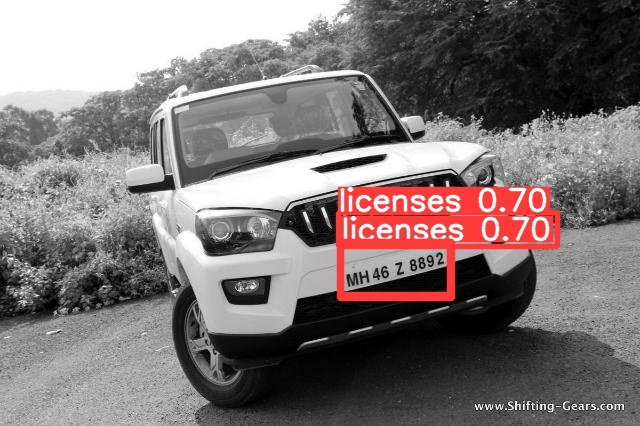

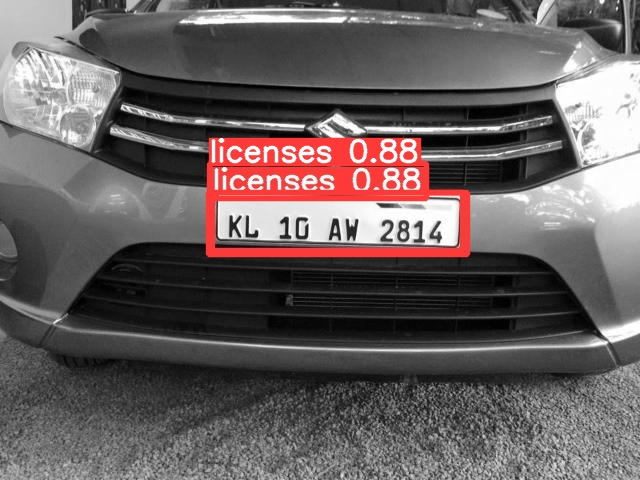

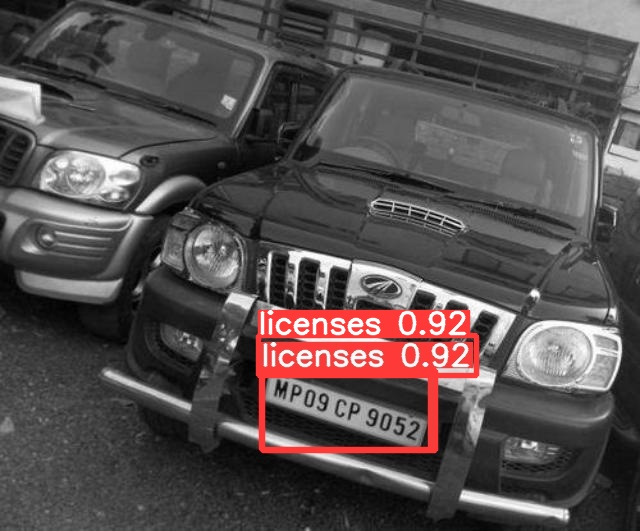

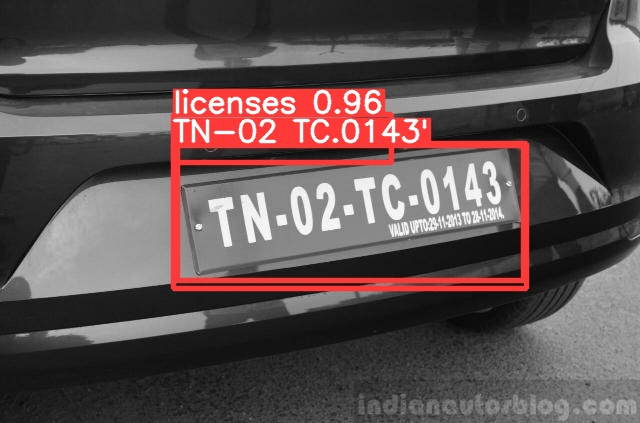

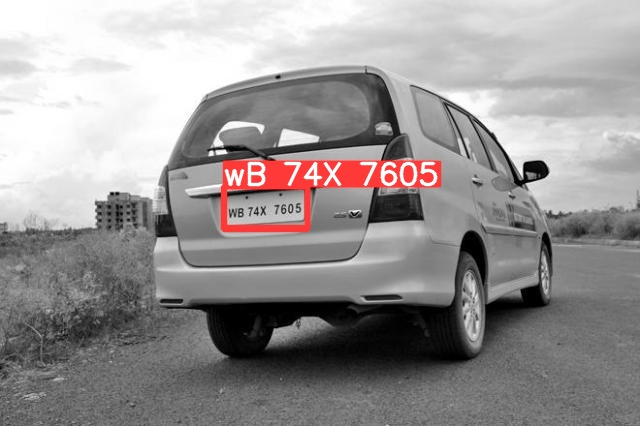

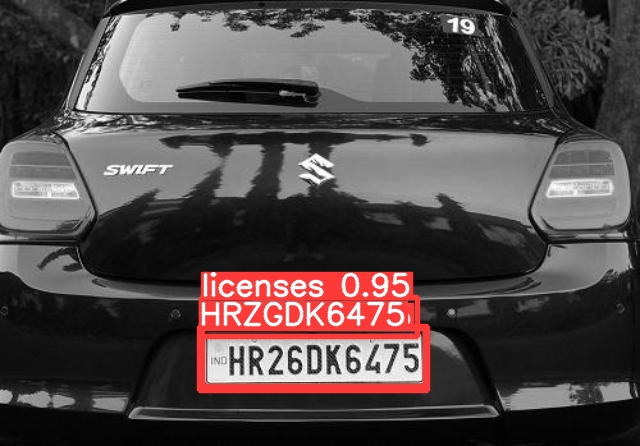

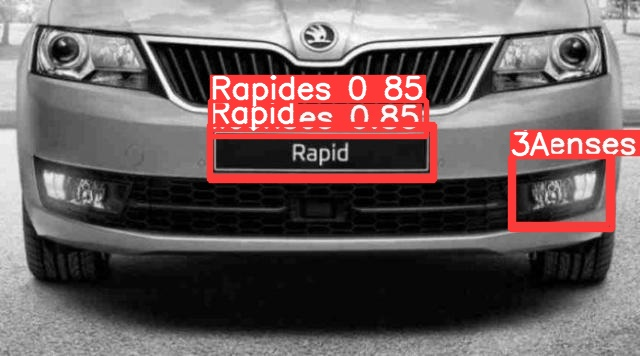

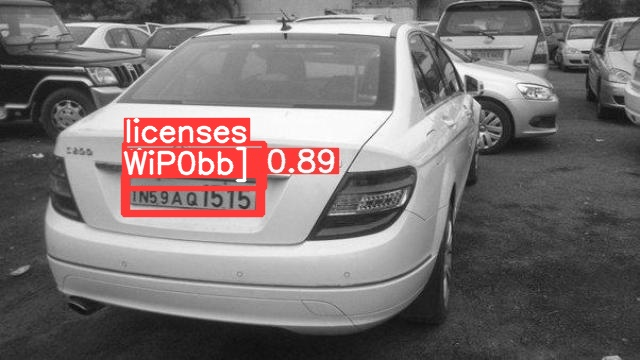

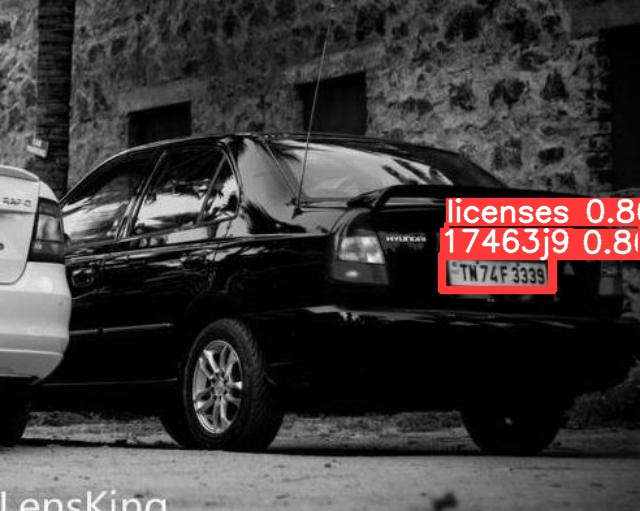

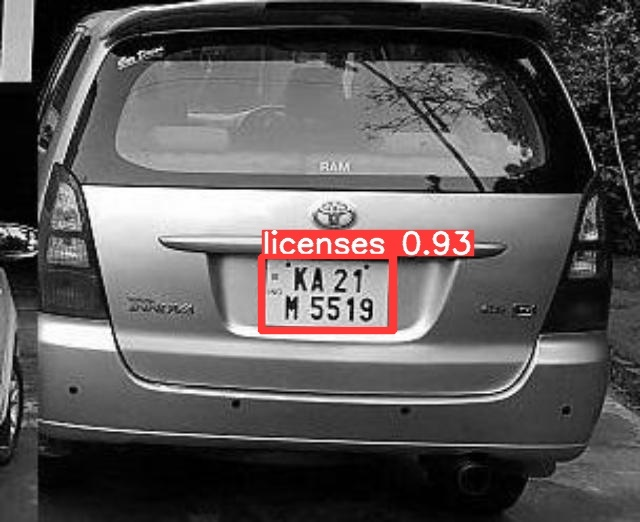

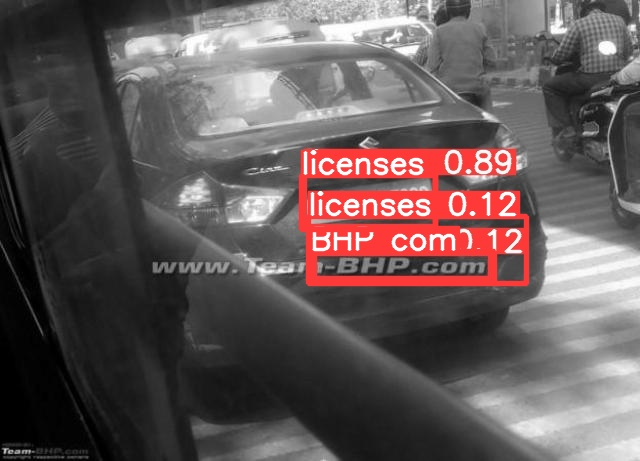

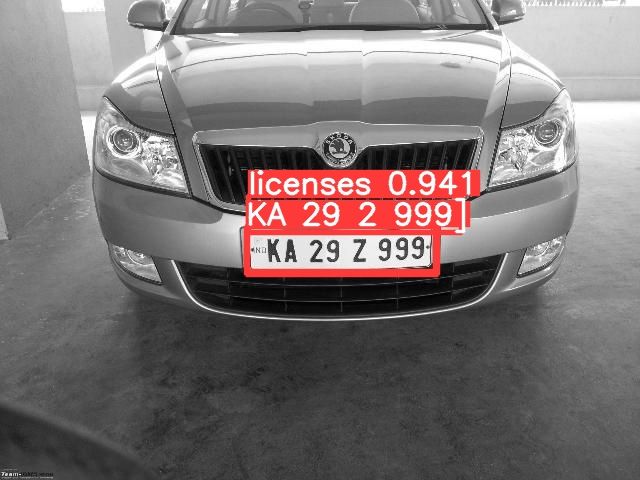

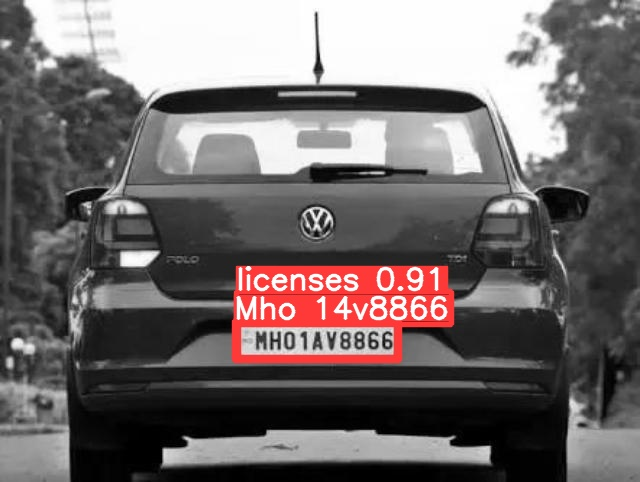

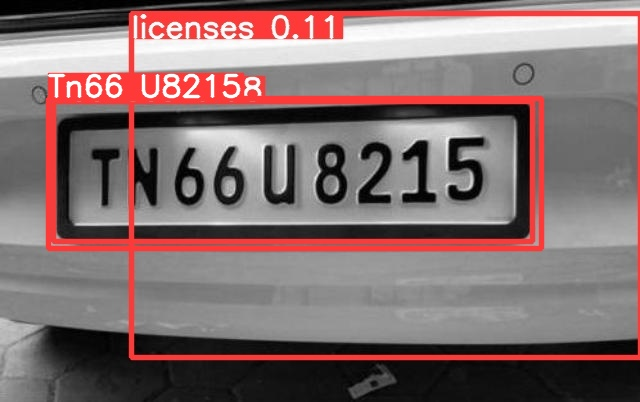

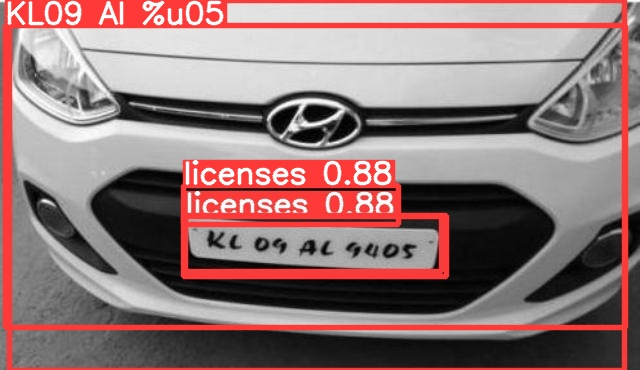

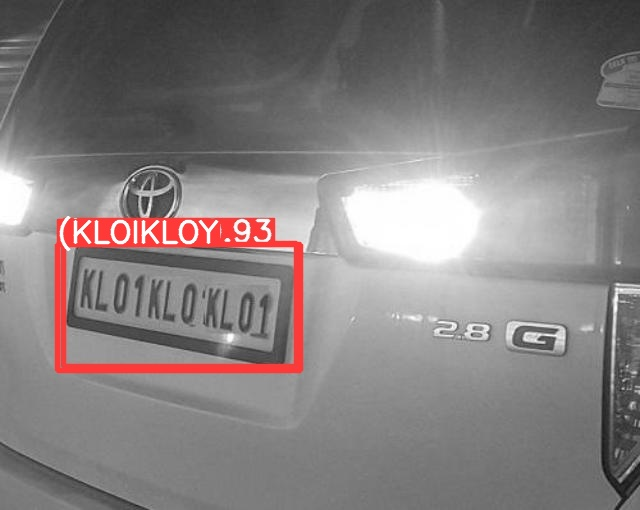

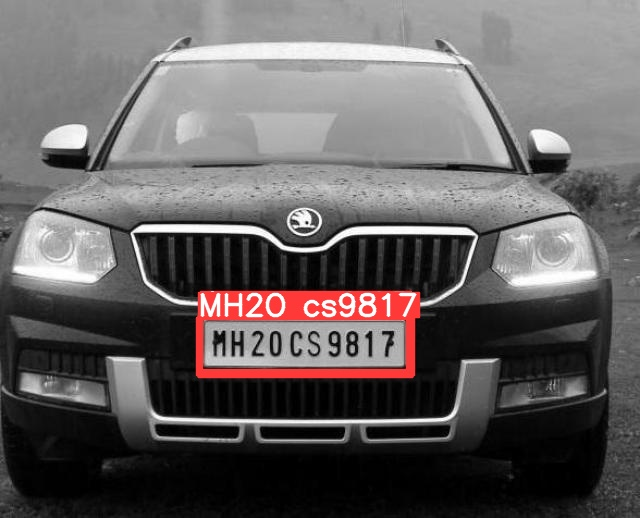

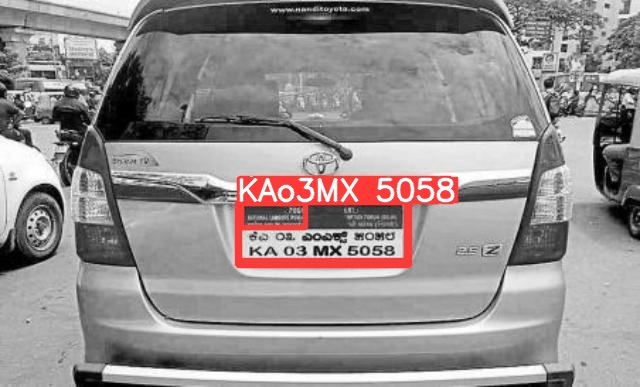

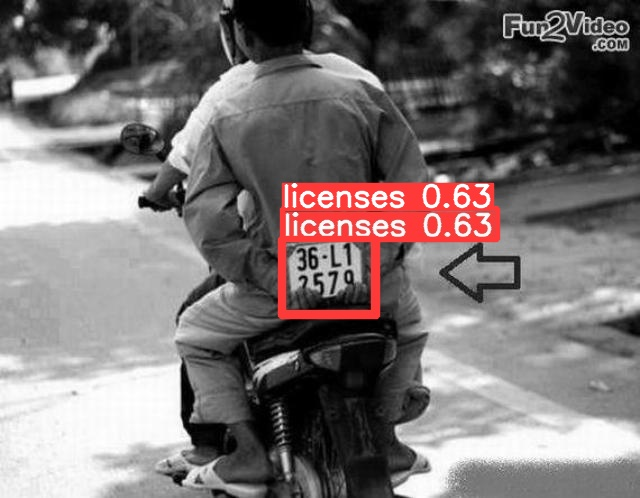

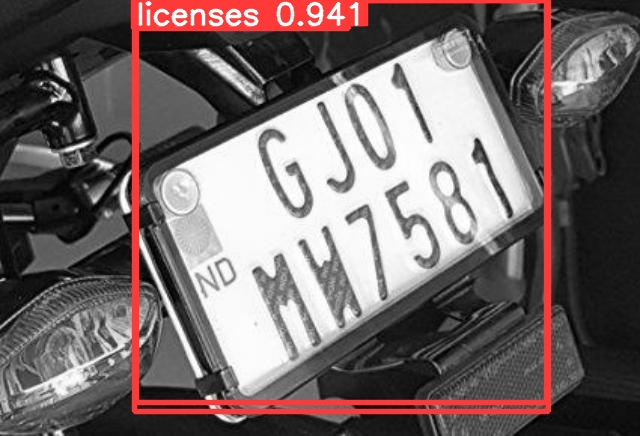

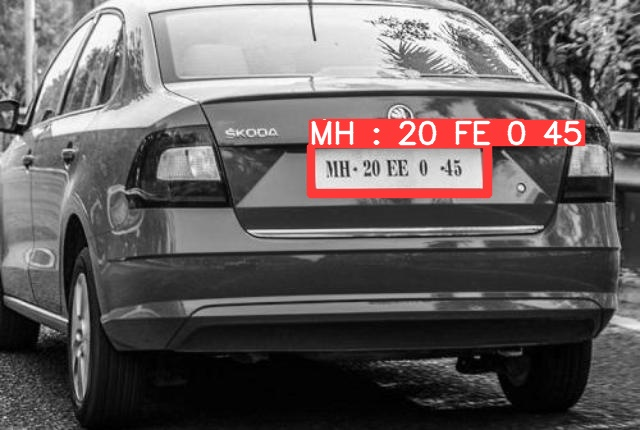

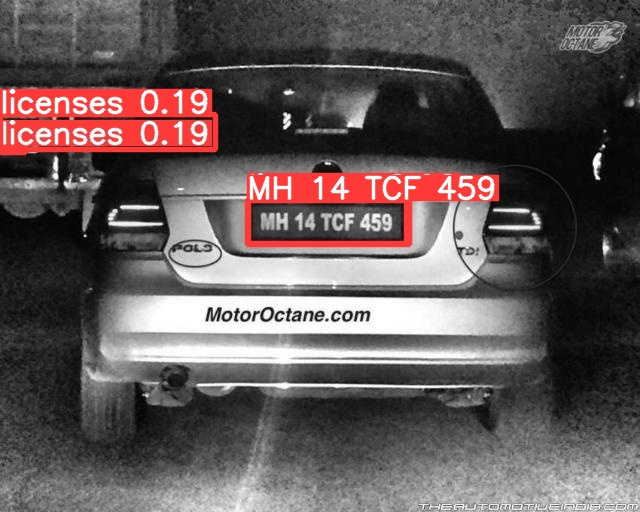

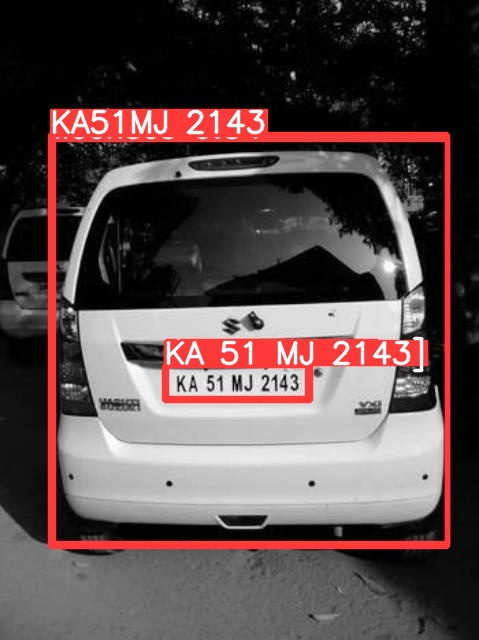

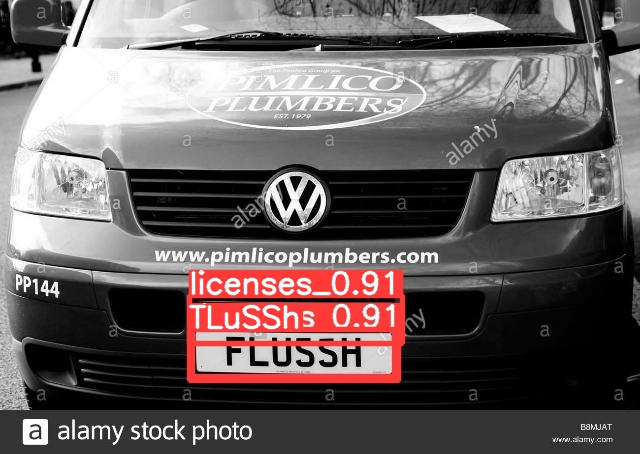

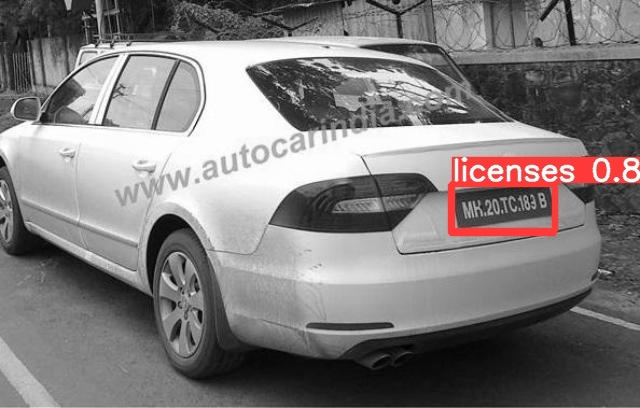

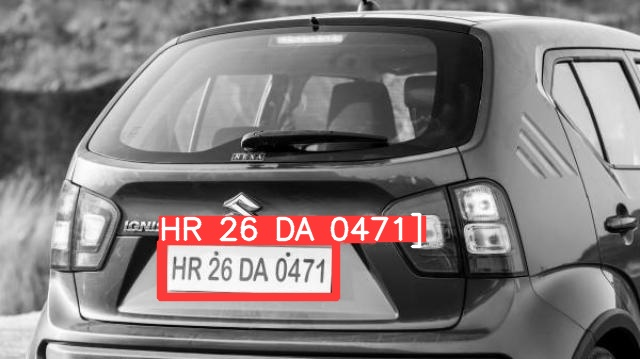

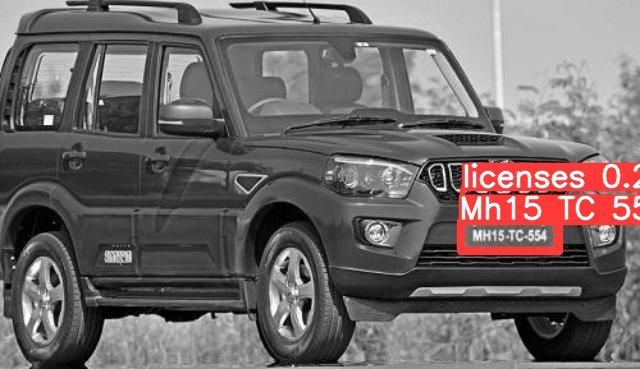

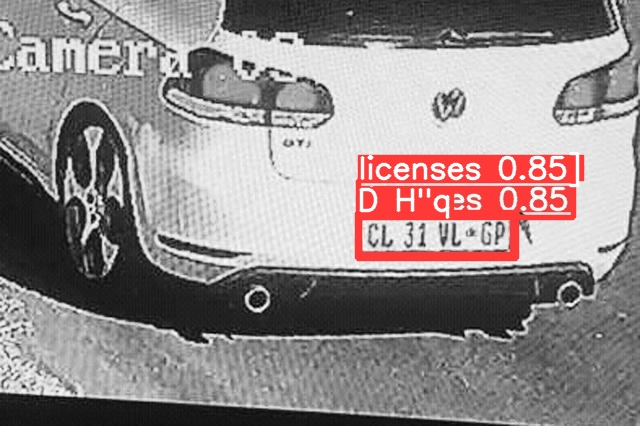

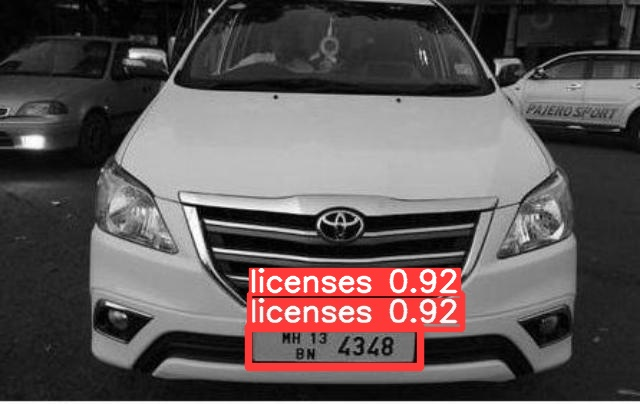

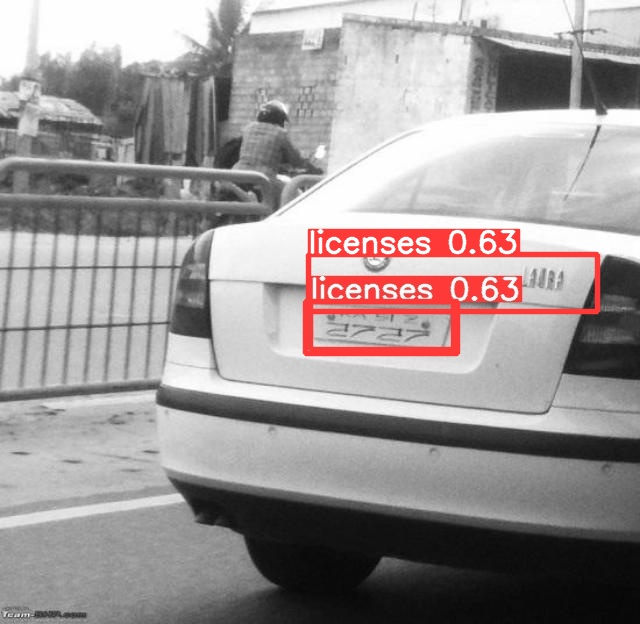

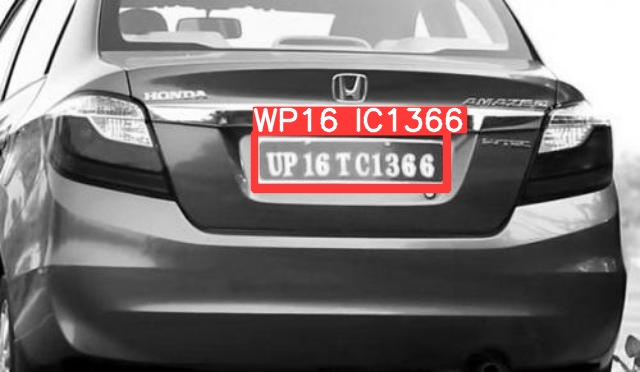

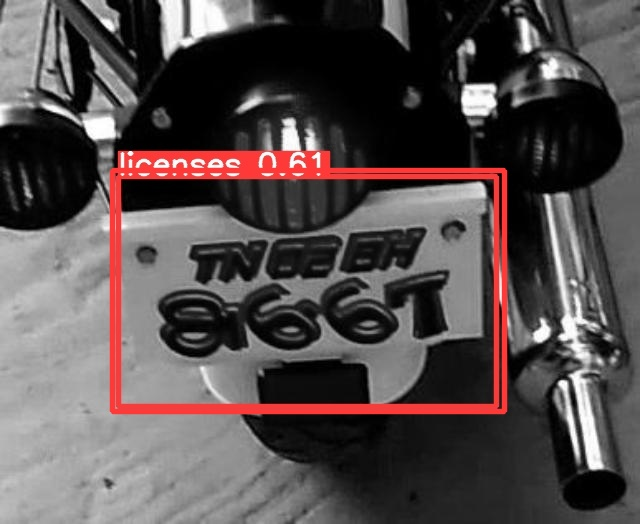

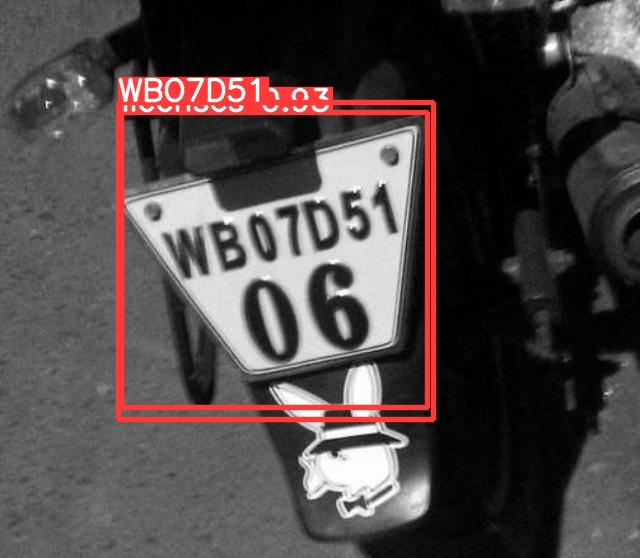

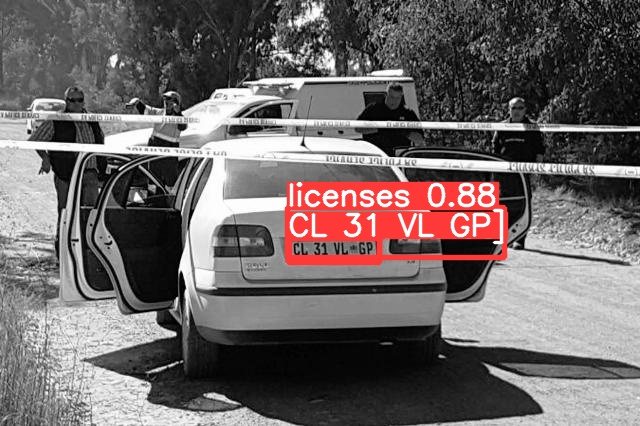

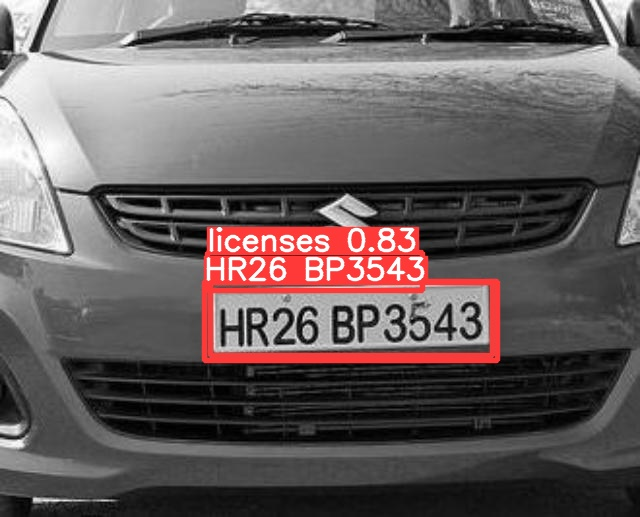

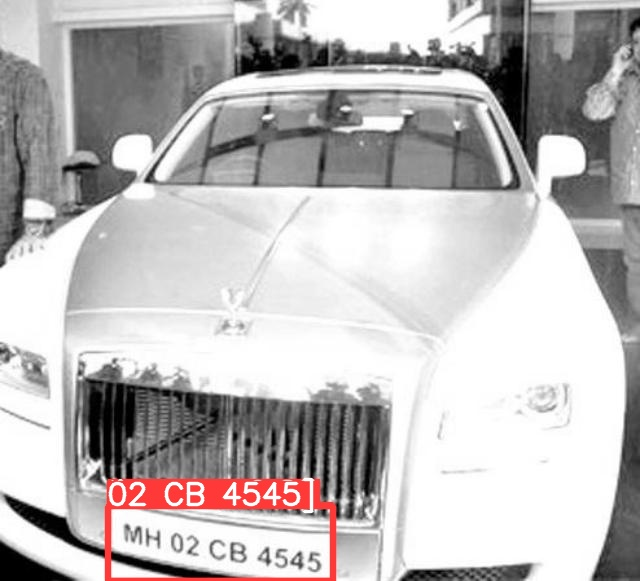

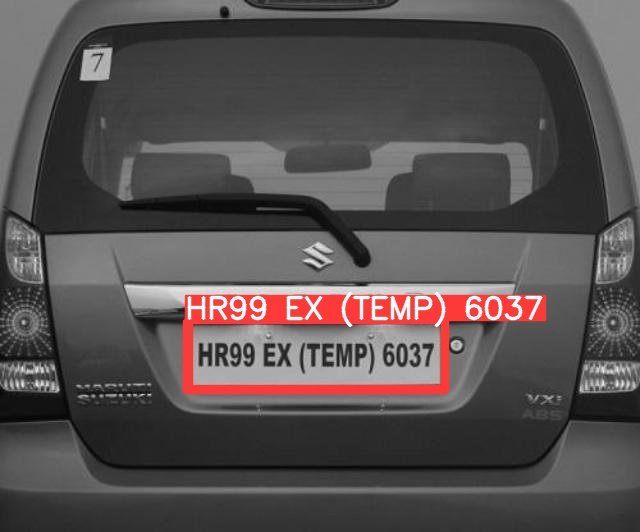

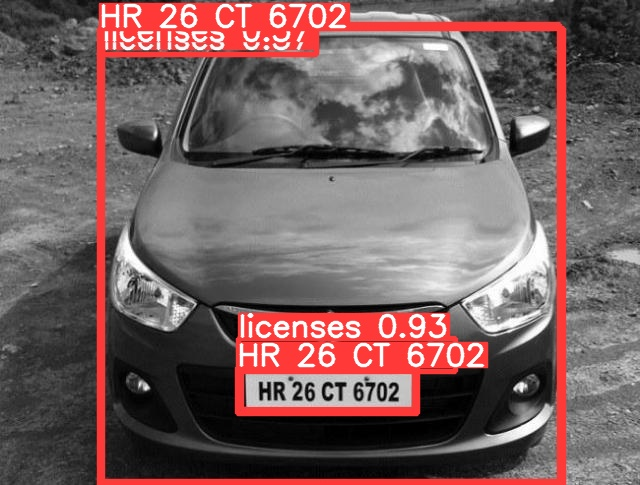

In [32]:
##Change the Source based on the output path in the results of above
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{home}/yolov9/runs/detect/exp4/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

## *Visual OCR in a video*
**We can extend the model's capabilities to process videos, enabling it to detect and extract license plate numbers from video frames. Instead of working solely with static images, the model will analyze each frame in the video, identify license plates, and perform OCR to extract the plate numbers dynamically.**

In [35]:
#Upload the video to /content/yolov9 folder
!python detect.py --conf 0.1 --device 0 --weights /content/yolov9/runs/train/exp/weights/best.pt --source car.mp4

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_o

In [36]:
!python detect_2.py --conf 0.1 --device 0 --weights /content/yolov9/runs/train/exp/weights/best.pt --source car.mp4

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

**Now when we download the video and view it, we will see the licenses being detected in real time.**